In [1]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
import numpy as np
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist

Text(0.5, 1.0, '0')

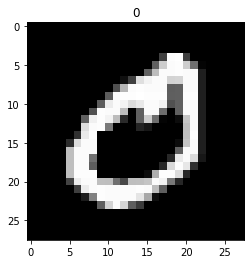

In [4]:
# Data collection and automatic split between training and testing
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()
# visualization of images
plt.imshow(X_treinamento[21], cmap = 'gray')
plt.title(y_treinamento[21])

In [5]:
# change of dimension
X_treinamento = X_treinamento.reshape((len(X_treinamento), np.prod(X_treinamento.shape[1:])))
X_teste = X_teste.reshape((len(X_teste), np.prod(X_teste.shape[1:])))
X_teste[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [6]:
# change datas for float
X_treinamento = X_treinamento.astype('float32')
X_teste = X_teste.astype('float32')

In [7]:
# normalization
X_treinamento /= 255
X_teste /= 255

In [8]:
# change for dummy format
y_treinamento = np_utils.to_categorical(y_treinamento, 10)
y_teste = np_utils.to_categorical(y_teste, 10)
y_teste[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [9]:
modelo = Sequential()
modelo.add(Dense(units = 64, activation = 'relu', input_dim = 784))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 64, activation = 'relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 64, activation = 'relu'))
modelo.add(Dropout(0.2))
#camada de saida, softmax probabilidade
modelo.add(Dense(units = 10, activation = 'softmax'))

In [10]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                6

In [11]:
#only 20 epochs for maximize the model
modelo.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
               metrics = ['accuracy'])
historico = modelo.fit(X_treinamento, y_treinamento, epochs = 20,
                       validation_data = (X_teste, y_teste))

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4518 - accuracy: 0.8618 - val_loss: 0.1656 - val_accuracy: 0.9511
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2347 - accuracy: 0.9322 - val_loss: 0.1313 - val_accuracy: 0.9603
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1896 - accuracy: 0.9444 - val_loss: 0.1275 - val_accuracy: 0.9640
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1663 - accuracy: 0.9519 - val_loss: 0.1198 - val_accuracy: 0.9660
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1522 - accuracy: 0.9556 - val_loss: 0.0995 - val_accuracy: 0.9720
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1399 - accuracy: 0.9582 - val_loss: 0.1108 - val_accuracy: 0.9697
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1331 - accuracy: 0.9617 - val_loss: 0.0982 - val_accuracy:

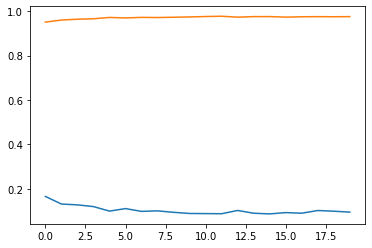

In [12]:
historico.history.keys()

plt.plot(historico.history['val_loss'])

plt.plot(historico.history['val_accuracy'])

In [13]:
previsoes = modelo.predict(X_teste)
previsoes

array([[5.6327526e-10, 1.0237359e-07, 9.3325452e-06, ..., 9.9996746e-01,
        3.2748519e-09, 2.0073065e-05],
       [2.2033333e-08, 2.5812010e-04, 9.9973613e-01, ..., 4.7385889e-08,
        1.0116045e-06, 2.3959693e-12],
       [7.1596917e-15, 9.9999928e-01, 3.9263441e-09, ..., 3.5469821e-08,
        5.8856085e-07, 7.8984687e-11],
       ...,
       [8.4862632e-09, 1.2418507e-08, 1.4026206e-06, ..., 7.5876846e-07,
        2.8711779e-06, 7.9001089e-05],
       [1.0772728e-14, 3.5619779e-13, 4.0022963e-13, ..., 6.2038096e-17,
        1.4660156e-09, 6.6158098e-13],
       [1.4383717e-12, 6.5864689e-15, 1.4000906e-14, ..., 6.9385946e-23,
        1.5716194e-11, 5.2041945e-20]], dtype=float32)

In [14]:
y_teste_matriz = [np.argmax(t) for t in y_teste]
y_previsoes_matriz = [np.argmax(t) for t in previsoes]
confusao = confusion_matrix(y_teste_matriz, y_previsoes_matriz)
confusao

array([[ 962,    1,    1,    0,    0,    3,    8,    1,    2,    2],
       [   0, 1126,    1,    1,    0,    2,    3,    0,    2,    0],
       [   3,    1, 1011,    3,    3,    0,    3,    5,    3,    0],
       [   0,    0,    5,  988,    0,    8,    0,    3,    2,    4],
       [   0,    0,    5,    0,  956,    0,    8,    0,    3,   10],
       [   2,    1,    0,    8,    1,  869,    7,    0,    2,    2],
       [   3,    3,    1,    0,    4,    2,  945,    0,    0,    0],
       [   1,    2,    9,    6,    2,    0,    0, 1001,    1,    6],
       [   7,    3,    4,    6,    5,    4,    6,    4,  927,    8],
       [   4,    3,    0,    8,   13,    4,    1,    4,    0,  972]],
      dtype=int64)

In [15]:
y_treinamento[20]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [16]:
novo = X_treinamento[20]

novo = np.expand_dims(novo, axis = 0)

pred = modelo.predict(novo)

pred = [np.argmax(pred) for t in pred]
pred

[4]